#Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from scipy.stats import boxcox

#Air Passengers

##Baixando e ajustando os dados

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2023-11-26 14:32:45--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-11-26 14:32:45 (25.1 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
df = pd.read_csv('/content/airline_passengers.csv', index_col = 'Month', parse_dates=True)

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

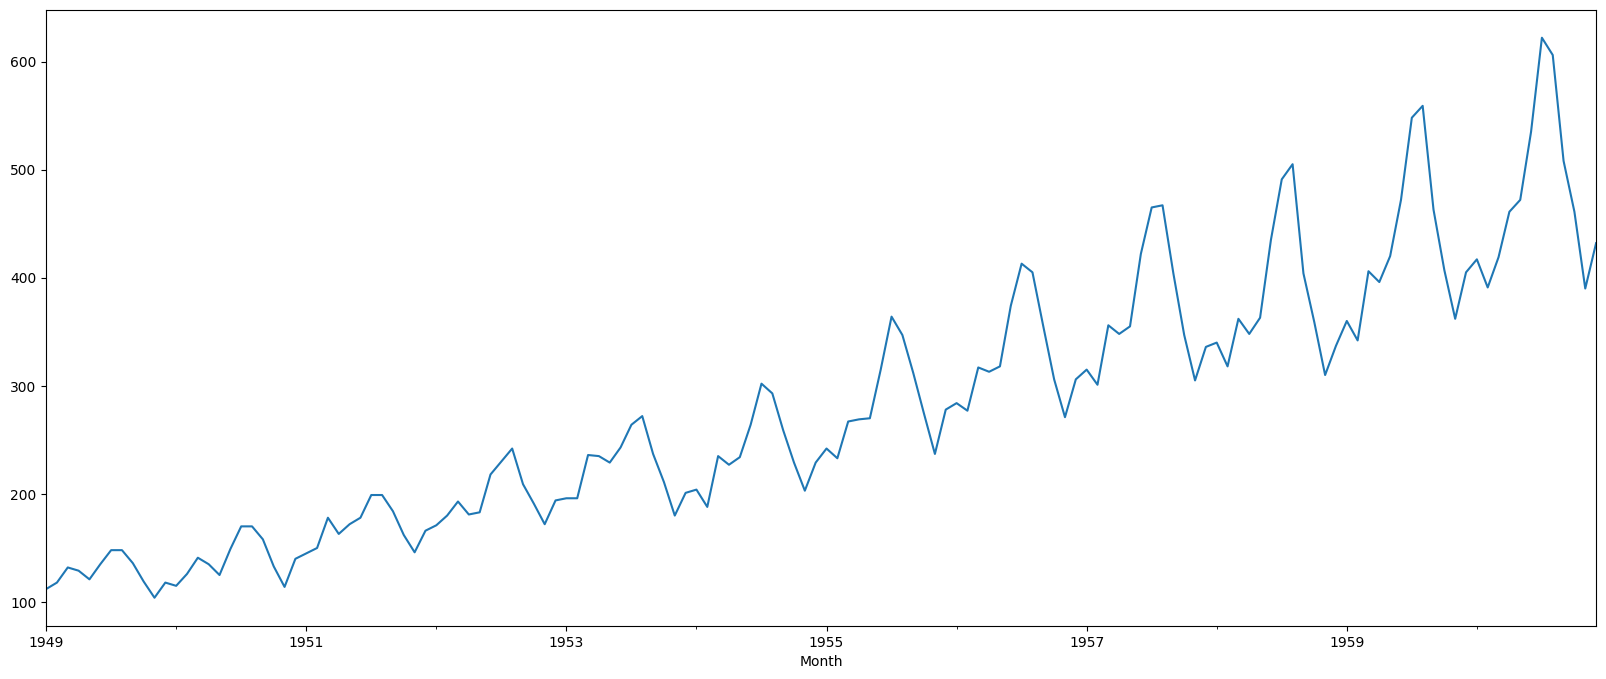

In [ ]:
df['Passengers'].plot(figsize=(20,8))

Os dados tem um tendencia e uma sazonalidade e que a amplitude da sazonalidade aumenta com o tempo.

Ideal seria retirar esse aumento de amplitude.

In [ ]:
##Tirando a raiz quadrada dos dados
df['SqrtPassengers']= np.sqrt(df['Passengers'])

<Axes: xlabel='Month'>

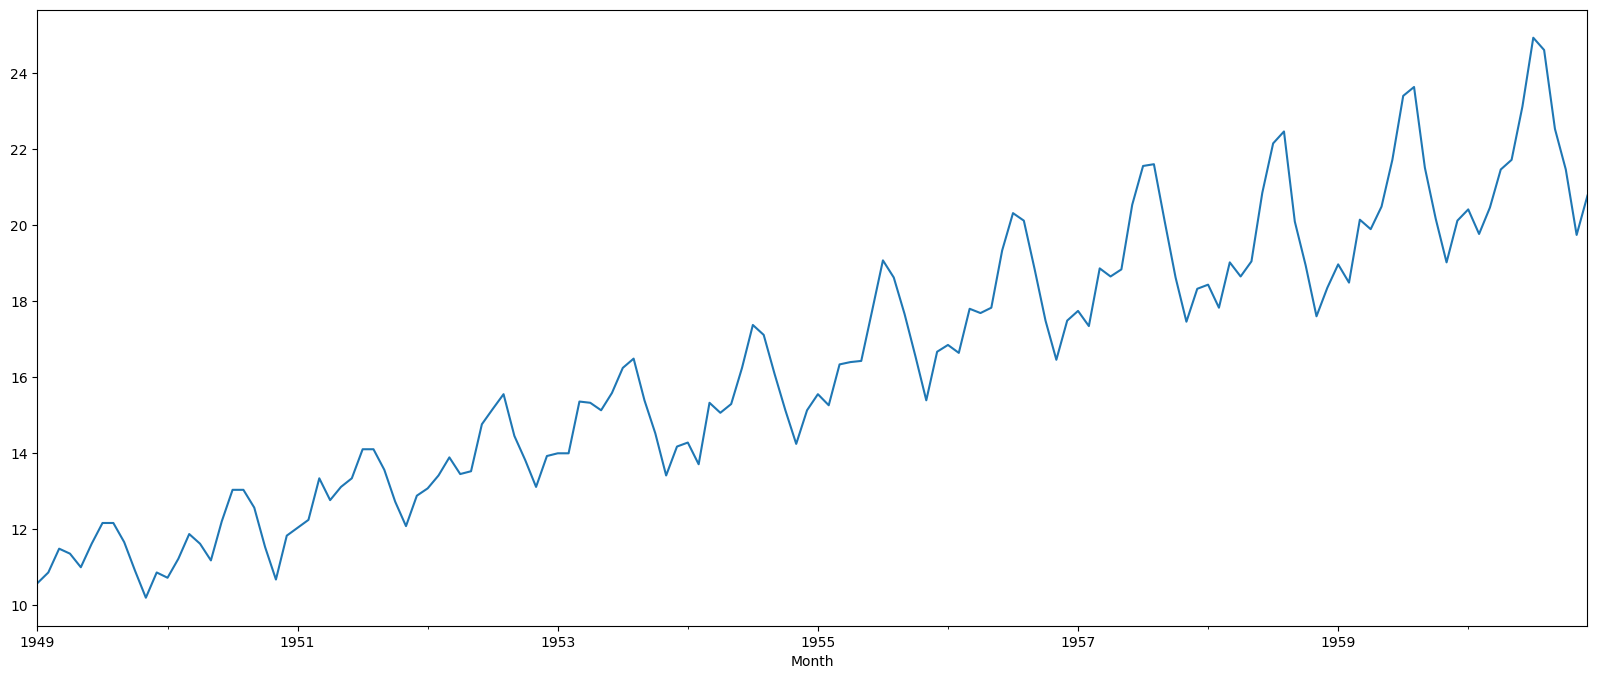

In [ ]:
df['SqrtPassengers'].plot(figsize=(20,8))

Os dados ficaram mais achatados mais ainda é possivel ver o efeito da amplitude ao longo do tempo. Ideal que eles fiquem mais uniformes ao longo do tempo

In [ ]:
#Escala Logaritimica
df['LogPassengers']= np.log(df['Passengers'])

<Axes: xlabel='Month'>

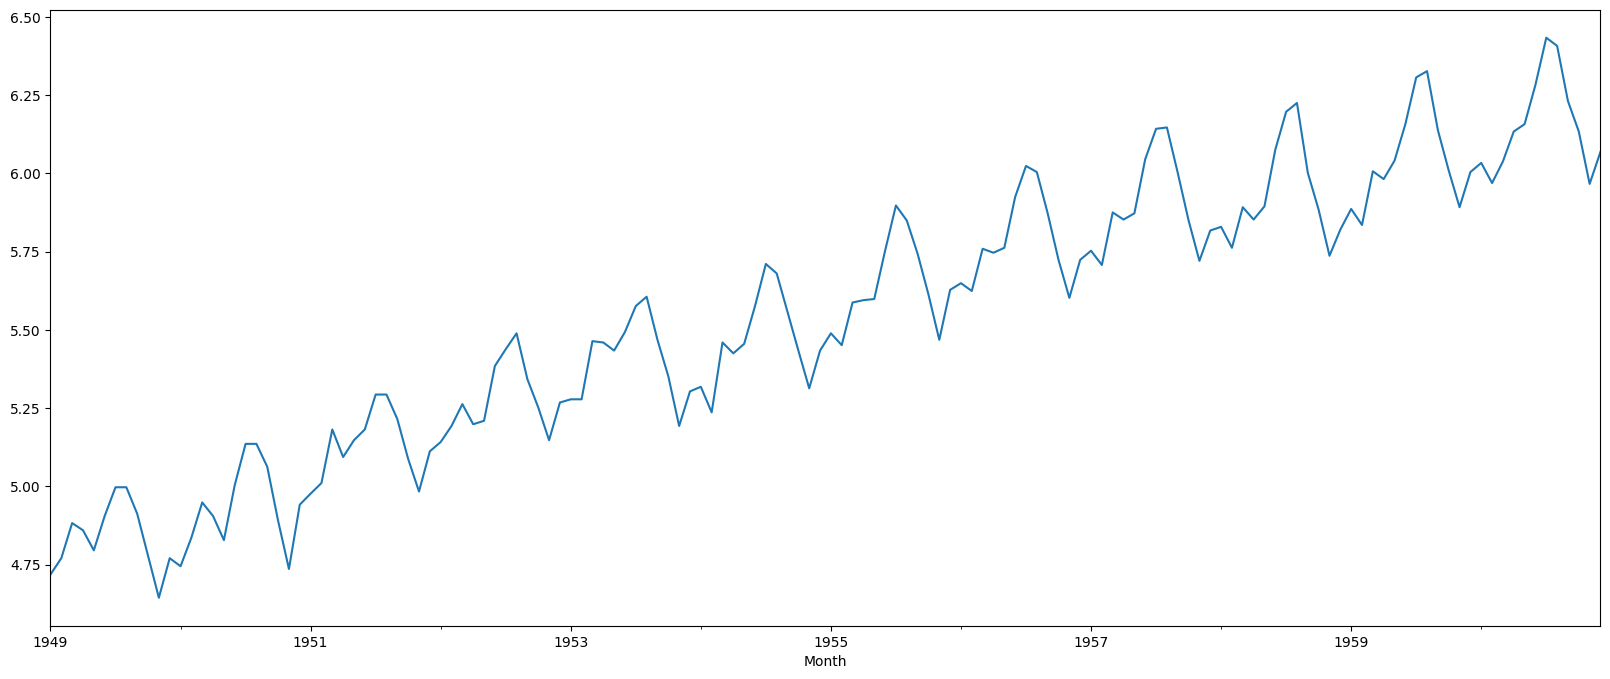

In [ ]:
df['LogPassengers'].plot(figsize=(20,8))

Achatou os dados e deixou eles mais uniformes ao longo do tempo

In [ ]:
#Boxcox
data,lam = boxcox(df['Passengers'])

In [ ]:
lam

0.14802265137037945

In [ ]:
df['BoxcoxPassengers']= data

<Axes: xlabel='Month'>

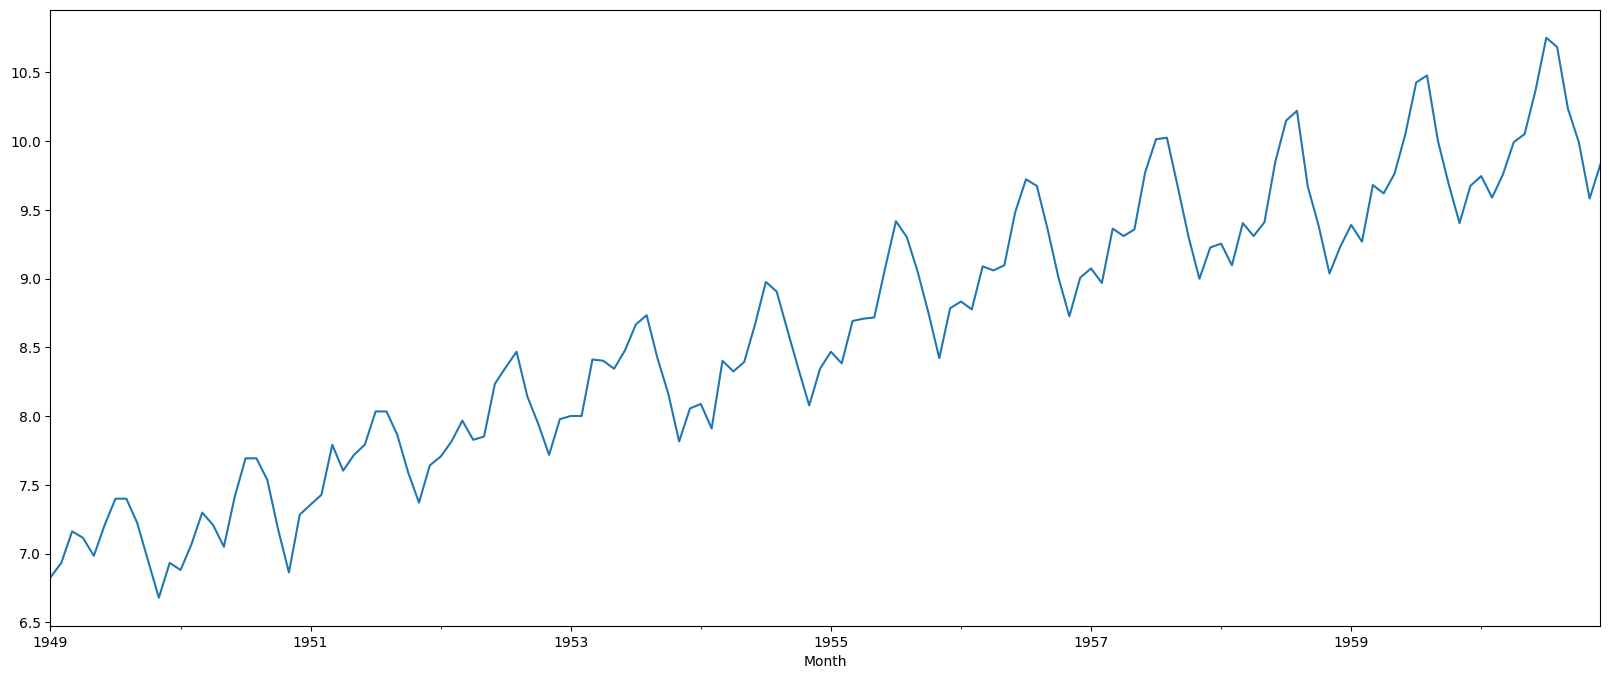

In [ ]:
df['BoxcoxPassengers'].plot(figsize=(20,8))

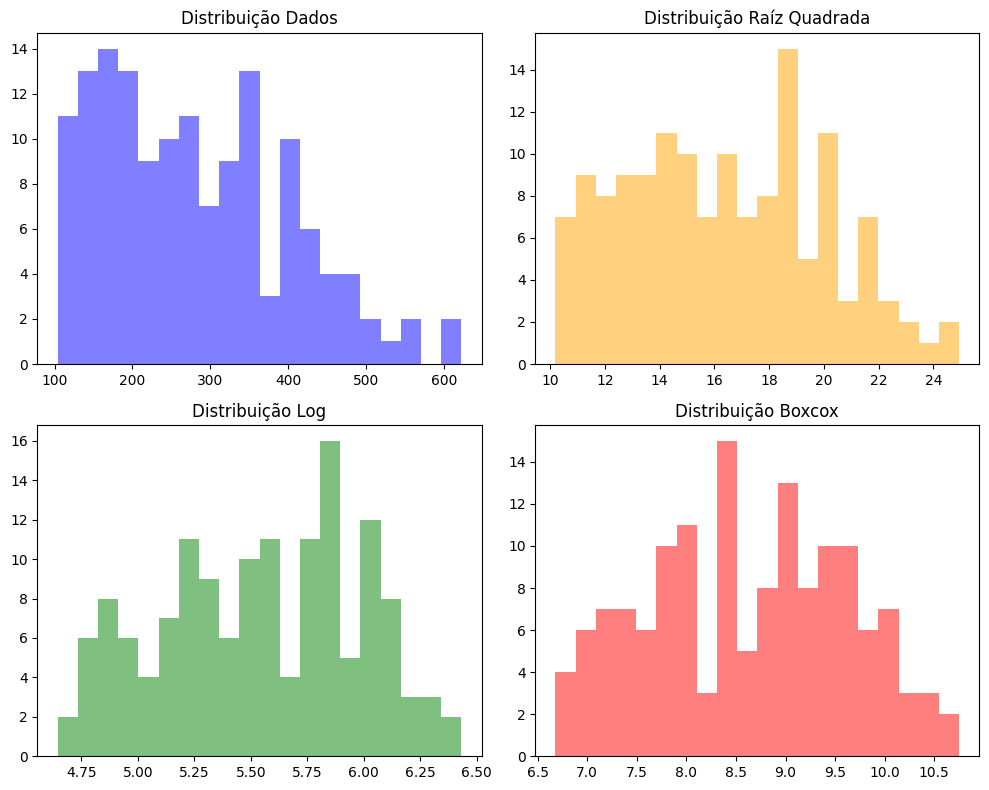

In [ ]:
# Criar um histograma para cada conjunto de dados
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Adicionar histogramas aos subplots
axs[0, 0].hist(df['Passengers'], bins=20, color='blue', alpha=0.5)
axs[0, 0].set_title('Distribuição Dados')

axs[0, 1].hist(df['SqrtPassengers'], bins=20, color='orange', alpha=0.5)
axs[0, 1].set_title('Distribuição Raíz Quadrada')

axs[1, 0].hist(df['LogPassengers'], bins=20, color='green', alpha=0.5)
axs[1, 0].set_title('Distribuição Log')

axs[1, 1].hist(df['BoxcoxPassengers'], bins=20, color='red', alpha=0.5)
axs[1, 1].set_title('Distribuição Boxcox')

# Ajustar o layout
plt.tight_layout()

# Mostrar os subplots
plt.show()

#Price Simulation in Code - stock simulation random

In [ ]:
#number of time steps
T = 1000

#initial price
P0 = 10

#drift
mu=0.001

In [ ]:
#last log price
last_p= np.log(P0)

log_returns = np.zeros(T)
prices=np.zeros(T)
for t in range (T):
  #sample a log return
  r=0.01 * np.random.randn()

  #compute the new log price
  p= last_p + mu + r

  #store the return and price
  log_returns[t] = r + mu
  prices[t] = np.exp(p)

  #assing last_p
  last_p = p

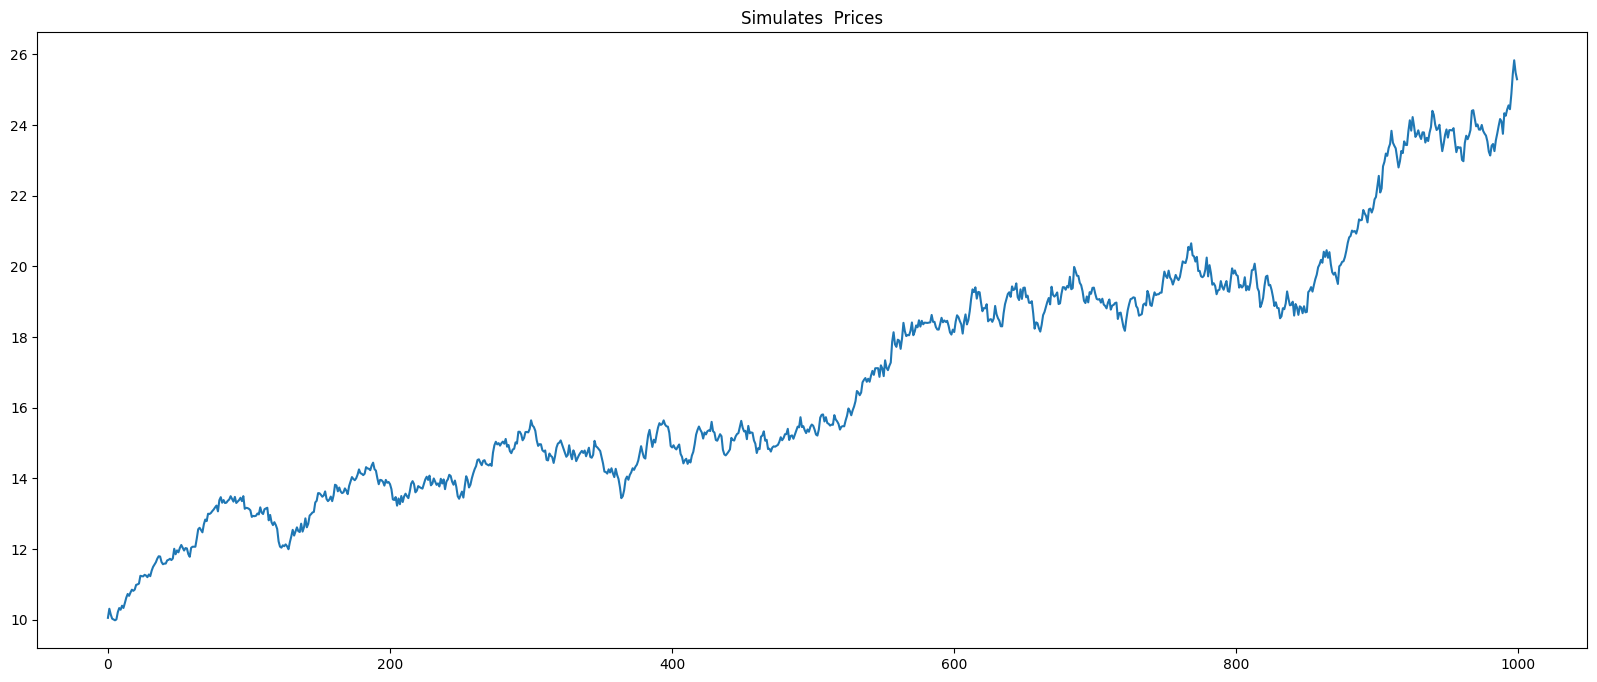

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(prices)
plt.title('Simulates  Prices');

In [ ]:
#Exercise: vectorize the above loop

In [ ]:
# Parâmetros
#T = 1000  # Número de períodos
#mu = 0.001  # Drift

# Log price inicial
#last_p = np.log(P0)

# Amostras de log return
#random_returns = 0.01 * np.random.randn(T)

# Vetorização: calcular todos os novos log prices simultaneamente
#log_returns = random_returns + mu
#log_prices = np.cumsum(log_returns)

# Calcular os preços finais
#prices = np.exp(last_p + log_prices)

In [ ]:
#plt.figure(figsize=(20,8))
#plt.plot(prices)
#plt.title('Simulates  Prices');

#Naive Forecast and Forecasting Metrics

In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv


--2023-11-26 15:18:45--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K  --.-KB/s    in 0.04s   

2023-11-26 15:18:45 (5.57 MB/s) - ‘SPY.csv’ saved [251935/251935]



In [ ]:
df = pd.read_csv('SPY.csv', index_col= 'Date', parse_dates= True) #Stock prices from S&P 500

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [ ]:
df['ClosePrediction'] = df['Close'].shift(1)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


In [ ]:
y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['ClosePrediction']

##Metrics

Observar como estes valores se relacionam um com o outro

In [ ]:
#SSE - Sum of squared errors
(y_true - y_pred).dot(y_true - y_pred)

6330.3742894926045

In [ ]:
#MSE
mean_squared_error(y_true,y_pred)

2.798573956451196

In [ ]:
(y_true - y_pred).dot(y_true - y_pred)/len(y_true)

2.7985739564511958

In [ ]:
#RSME
np.sqrt((y_true - y_pred).dot(y_true - y_pred)/len(y_true))

1.6728938867875618

In [ ]:
mean_squared_error(y_true, y_pred, squared= False)

1.672893886787562

In [ ]:
#MAE
mean_absolute_error(y_true, y_pred)

1.1457559803120336

In [ ]:
#R^2
r2_score(y_true, y_pred)

0.9989603259063914

In [ ]:
#MAPE
mean_absolute_percentage_error(y_true,y_pred)

0.006494073151422373

In [ ]:
#sMAPE
def smape(y_true, y_pred):
  numerator = np.abs(y_true - y_pred)
  denominator = (np.abs(y_true) + np.abs(y_pred))/2
  ratio = numerator/denominator
  return ratio.mean()

smape(y_true, y_pred)

0.006491365814068417